In [1]:
# Cài đặt thư viện vnstock từ Pypi - bản ổn định | Install vnstock from Pypi - stable version
!pip install --upgrade vnstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 895.4 kB/s eta 0:00:00


In [42]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import streamlit as st
from prophet import Prophet
from prophet.plot import plot_plotly
import keras.callbacks
from sklearn.preprocessing import MinMaxScaler
#Importing necessary libraries
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from vnstock import * #import all functions


In [47]:
df=stock_historical_data("GMD", "2021-01-01", "2022-02-25", "1D")
df

,time,open,high,low,close,volume,ticker
0,2021-01-04,31390,32340,31200,31490,4226500,GMD
1,2021-01-05,31490,32770,31150,32150,4851900,GMD
2,2021-01-06,32530,32530,31490,31770,3641300,GMD
3,2021-01-07,32060,32820,30920,32340,5753700,GMD
4,2021-01-08,32720,33100,31870,32250,4587500,GMD
...,...,...,...,...,...,...,...
279,2022-02-21,50530,51210,49950,49950,1489200,GMD
280,2022-02-22,49260,51120,48290,50920,3583400,GMD
281,2022-02-23,50920,51990,50630,50820,2823400,GMD
282,2022-02-24,50240,51510,48970,50140,2961300,GMD


In [65]:
data = df.filter(['close'])
training_data_len = math.ceil(len(data)*0.7)
training_data_len

199

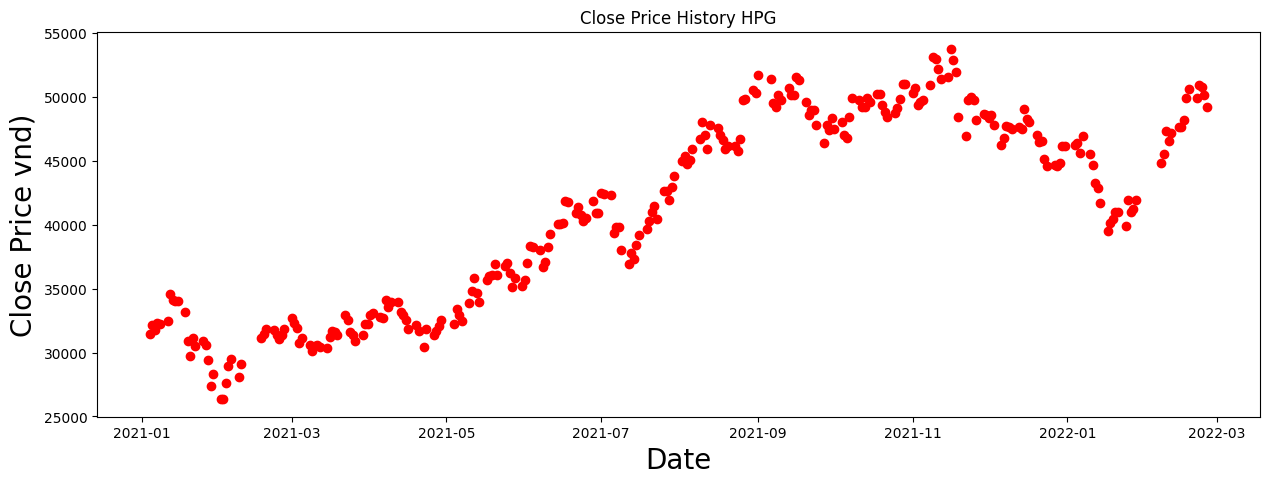

In [66]:
#Plotting the the graph
plt.figure(figsize=(15,5))
plt.title('Close Price History'+ ' HPG')
plt.scatter(df['time'],df['close'],c='Red')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price vnd)', fontsize=20)
plt.show()

In [70]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))

In [72]:
#splitting dataset into train and test split
train_size = int(len(scaled_data) * 0.70)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :1]

In [73]:
# convert an array of values into a dataset matrix
import numpy
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [74]:
look_back =60
X_train,Y_train,X_test,Y_test = [],[],[],[]
X_train,Y_train=create_data_set(train,look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test,Y_test=create_data_set(test,look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [76]:
# create and fit the LSTM network regressor = Sequential()
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(X_train, Y_train, epochs = 10, batch_size = 32,validation_data=(X_test, Y_test), callbacks=[reduce_lr],shuffle=False)

Epoch 1/10
5/5 [==============================] - 8s 404ms/step - loss: 0.1783 - val_loss: 0.0446 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 0s 87ms/step - loss: 0.0258 - val_loss: 0.0643 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 0s 93ms/step - loss: 0.0269 - val_loss: 0.0331 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 0s 89ms/step - loss: 0.0241 - val_loss: 0.0299 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 0s 89ms/step - loss: 0.0097 - val_loss: 0.0311 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 0s 89ms/step - loss: 0.0169 - val_loss: 0.0280 - lr: 0.0010
Epoch 7/10
5/5 [==============================] - 0s 88ms/step - loss: 0.0144 - val_loss: 0.0281 - lr: 0.0010
Epoch 8/10
5/5 [==============================] - 0s 101ms/step - loss: 0.0115 - val_loss: 0.0269 - lr: 0.0010
Epoch 9/10
5/5 [==============================] - 0s 89ms/step - loss: 0.0106 - val_loss: 0.0293 - lr: 0.0010
Epoch 10

In [77]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

1/1 [==============================] - 0s 38ms/step


Train Mean Absolute Error: 1750.2862682481752
Train Root Mean Squared Error: 2140.078006405833
Test Mean Absolute Error: 4275.72953125
Test Root Mean Squared Error: 4517.824960003199


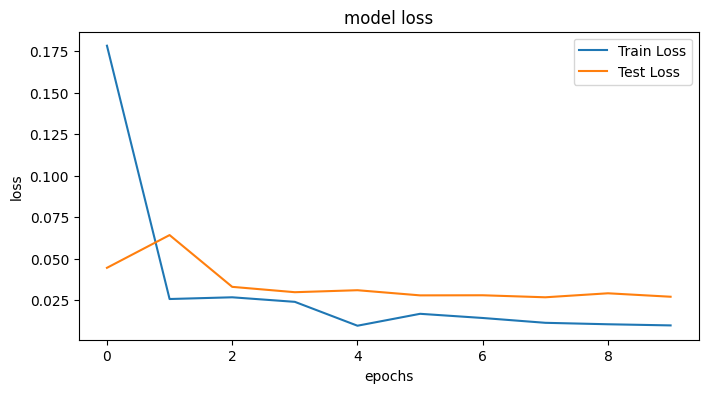

In [78]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [89]:
#creatinf testing dataset
test_data = scaled_data[training_data_len - 60: , :]

#creating x_test and y_tets datasets
x_test = []
#y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i -60:i, 0])

#converting data to numpy array
x_test = np.array(x_test)

#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get predicted price values
predictions = regressor.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

3/3 [==============================] - 0s 46ms/step


array([[48707.332],
       [48761.79 ],
       [48807.56 ],
       [48845.332],
       [48879.234],
       [48917.492],
       [48964.234],
       [49017.758],
       [49078.25 ],
       [49137.95 ],
       [49193.633],
       [49243.58 ],
       [49292.53 ],
       [49353.63 ],
       [49431.816],
       [49524.652],
       [49625.355],
       [49729.516],
       [49843.47 ],
       [49964.508],
       [50085.895],
       [50186.332],
       [50247.816],
       [50275.855],
       [50276.605],
       [50254.75 ],
       [50208.117],
       [50140.418],
       [50055.277],
       [49955.96 ],
       [49847.46 ],
       [49730.062],
       [49597.938],
       [49452.836],
       [49302.047],
       [49150.6  ],
       [49002.027],
       [48860.234],
       [48726.92 ],
       [48611.195],
       [48513.5  ],
       [48432.652],
       [48361.69 ],
       [48293.53 ],
       [48224.582],
       [48145.867],
       [48050.812],
       [47937.625],
       [47807.035],
       [47662.74 ],


In [90]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid

<ipython-input-90-fb6554dbe6ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,close,Predictions
199,48480,48707.332031
200,48780,48761.789062
201,49170,48807.558594
202,49850,48845.332031
203,51020,48879.234375
...,...,...
279,49950,45001.558594
280,50920,45343.402344
281,50820,45706.589844
282,50140,46082.222656


<ipython-input-85-df59efc673b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


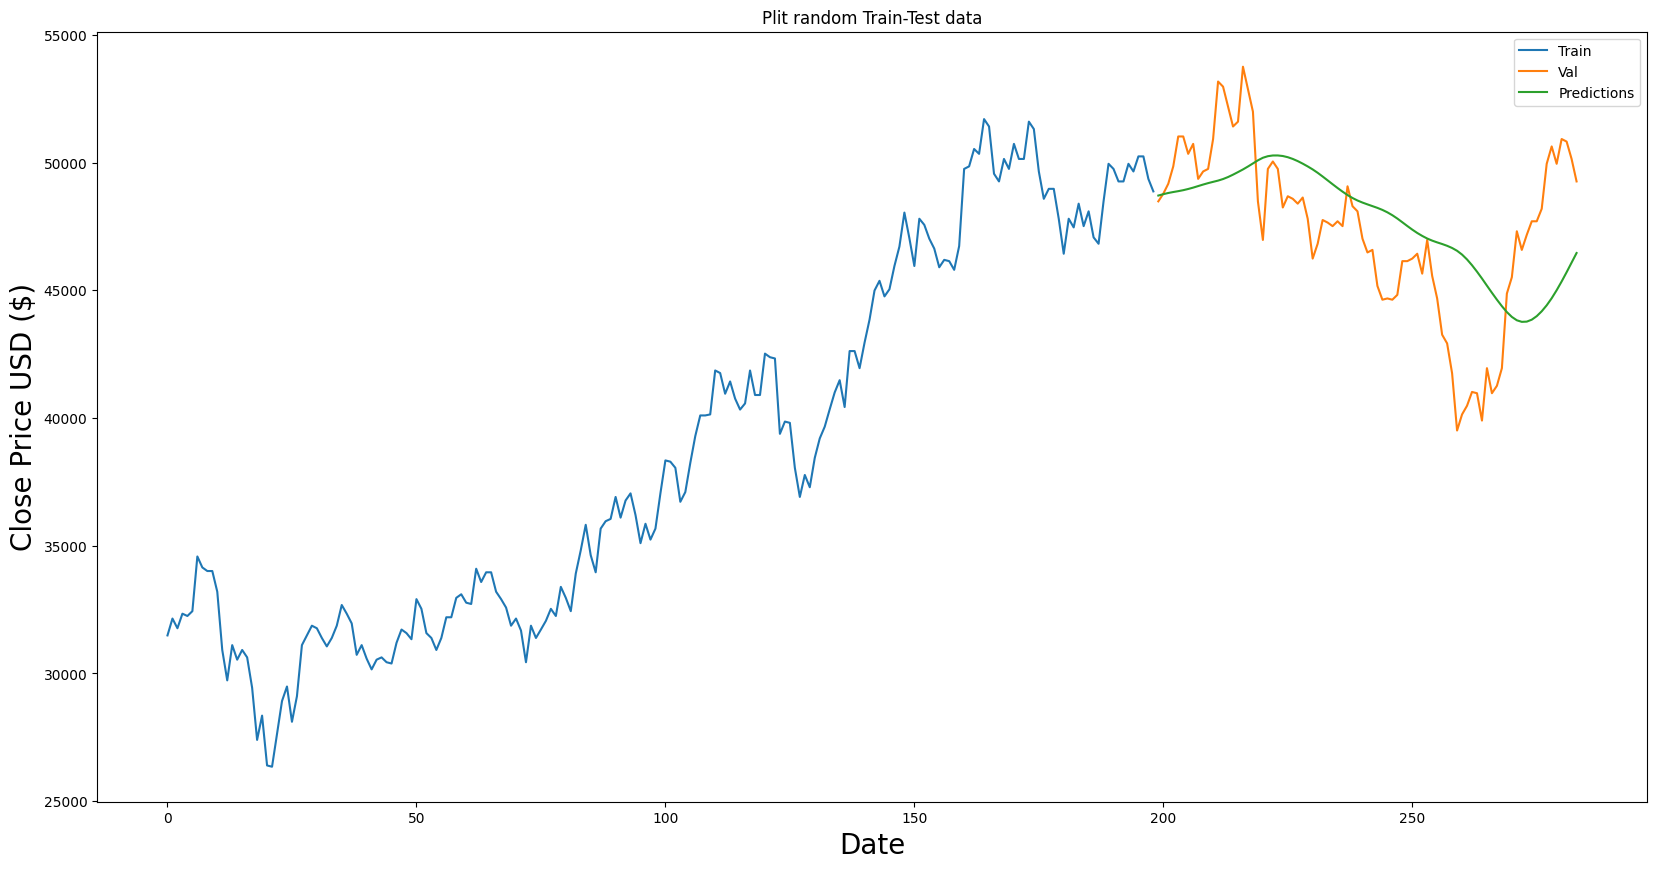

In [85]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualization
plt.figure(figsize=(20,10))
plt.title('Plit random Train-Test data')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='upper right')
plt.show()

In [86]:
valid

,close,Predictions
199,48480,48707.332031
200,48780,48761.789062
201,49170,48807.558594
202,49850,48845.332031
203,51020,48879.234375
...,...,...
279,49950,45001.558594
280,50920,45343.402344
281,50820,45706.589844
282,50140,46082.222656


In [87]:
dataset_test = data[-60:].values

inputs = dataset_test
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

i = 0
while i < 30:
    X_test = []
    no_of_sample = len(inputs)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample-30:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = regressor.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    dataset_test = np.append(dataset_test, predicted_stock_price[0])
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    print('Price next (' + str(i+1) + ') days : ', predicted_stock_price[0][0])
    i = i + 1

1/1 [==============================] - 2s 2s/step
Price next (1) days :  46642.098
1/1 [==============================] - 0s 31ms/step
Price next (2) days :  46968.94
1/1 [==============================] - 0s 30ms/step
Price next (3) days :  47250.2
1/1 [==============================] - 0s 29ms/step
Price next (4) days :  47483.633
1/1 [==============================] - 0s 34ms/step
Price next (5) days :  47668.008
1/1 [==============================] - 0s 24ms/step
Price next (6) days :  47810.457
1/1 [==============================] - 0s 26ms/step
Price next (7) days :  47919.703
1/1 [==============================] - 0s 26ms/step
Price next (8) days :  47995.16
1/1 [==============================] - 0s 25ms/step
Price next (9) days :  48045.0
1/1 [==============================] - 0s 32ms/step
Price next (10) days :  48075.2
1/1 [==============================] - 0s 27ms/step
Price next (11) days :  48092.53
1/1 [==============================] - 0s 32ms/step
Price next (12) days :

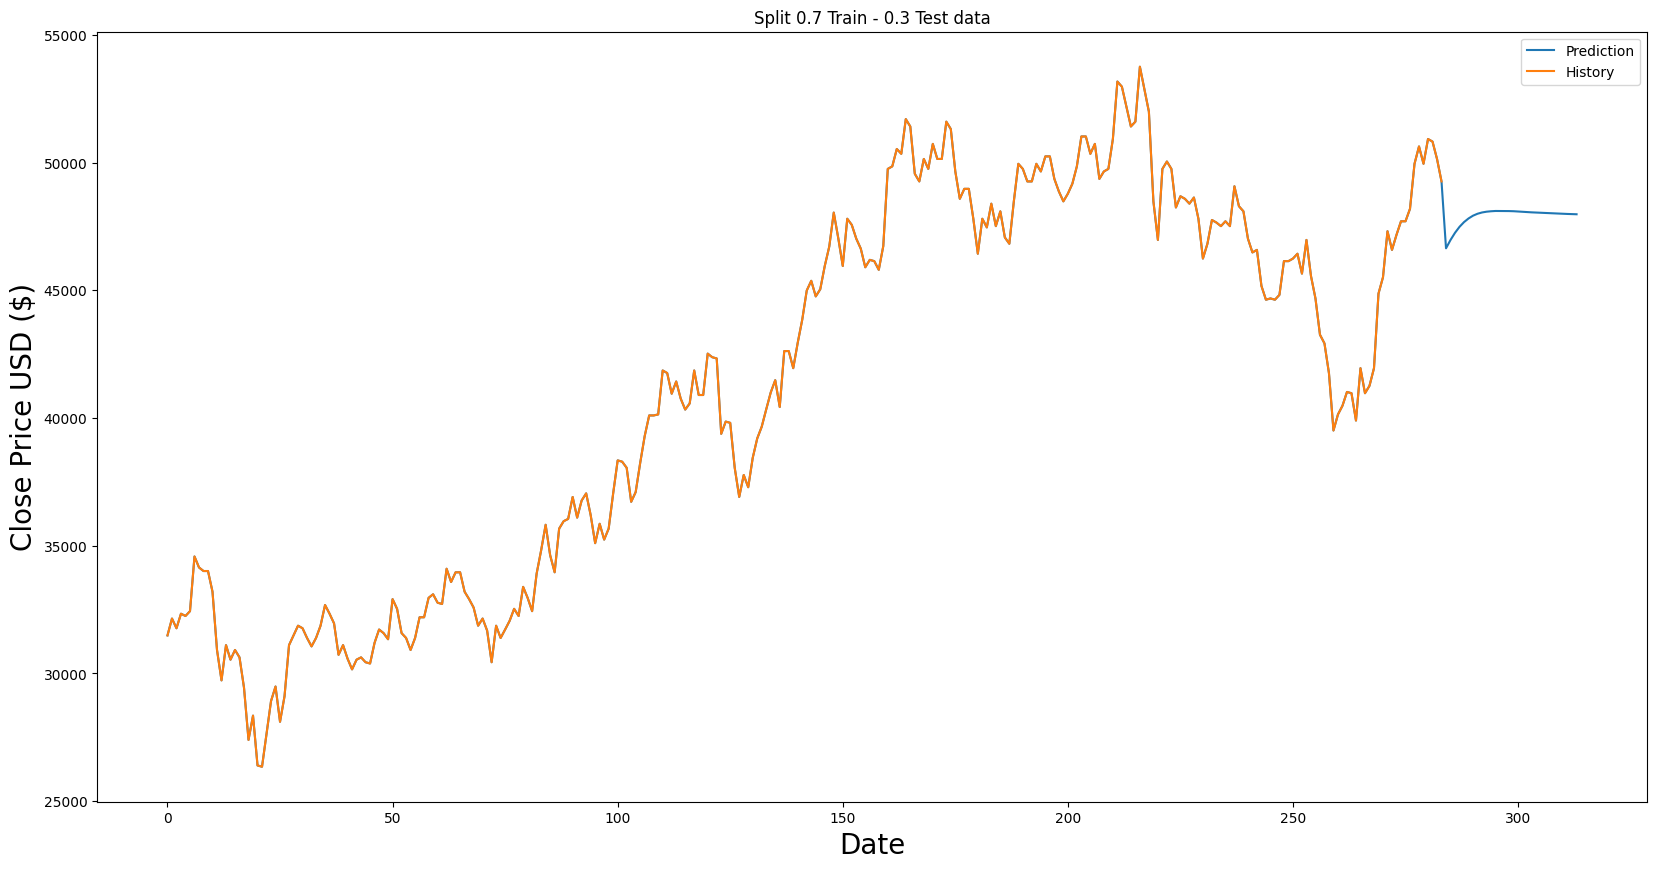

In [88]:
dataset_pre = np.append(data['close'], dataset_test[60:])

#visualization
plt.figure(figsize=(20,10))
plt.title('Split 0.7 Train - 0.3 Test data')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(dataset_pre)
plt.plot(dataset[:])
plt.legend(['Prediction', 'History'], loc='upper right')
plt.show()